<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

-   Be confident about your data analysis skills


This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.


You will need the following libraries:


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



<b>1.0 Importing the Data</b>


Load the csv:


In [45]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [46]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.


In [47]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> use the method <code>groupby</code> to get the number of wine servings per continent:


In [48]:
#Create New df Wine Group
df_wine_gp = df[['wine_servings','continent']]

#grouping results
df_wine_gp = df_wine_gp.groupby(['continent'],as_index=False).mean()
df_wine_gp


,continent,wine_servings
0,Africa,16.264151
1,Asia,9.068182
2,Europe,142.222222
3,North America,24.521739
4,Oceania,35.625000
5,South America,62.416667


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [55]:
df_beer_continent_test = df[['continent', 'beer_servings']]
df_beer_continent_grp = df_beer_continent_test.groupby('continent')

df_beer_continent_grp.describe()




beer_servings                                              \
                      count        mean        std   min     25%    50%   
continent                                                                 
Africa                 53.0   61.471698  80.557816   0.0   15.00   32.0   
Asia                   44.0   37.045455  49.469725   0.0    4.25   17.5   
Europe                 45.0  193.777778  99.631569   0.0  127.00  219.0   
North America          23.0  145.434783  79.621163   1.0   80.00  143.0   
Oceania                16.0   89.687500  96.641412   0.0   21.00   52.5   
South America          12.0  175.083333  65.242845  93.0  129.50  162.5   

                              
                  75%    max  
continent                     
Africa          76.00  376.0  
Asia            60.50  247.0  
Europe         270.00  361.0  
North America  198.00  285.0  
Oceania        125.75  306.0  
South America  198.00  333.0

<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


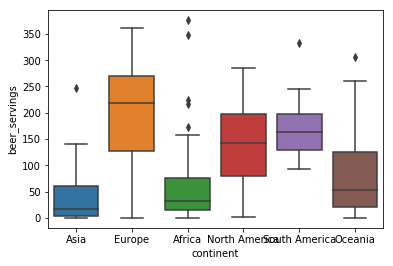

In [11]:
#Import seaborn
import seaborn as sns 

#plot boxplot
sns.boxplot(x="continent", y="beer_servings", data=df)

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


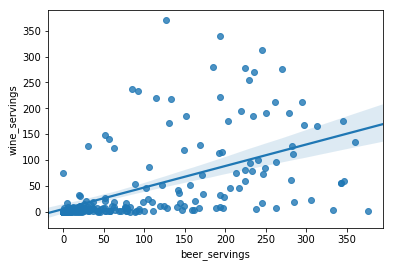

In [12]:
#create scatterplot diagram
sns.regplot(x="beer_servings",y="wine_servings", data=df)


<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


total_litres_of_pure_alcohol =  3.1540794346874996 + [0.03160757] x wine_servings
The R-square is:  0.4456875459787605


(0, 18.033217683607333)

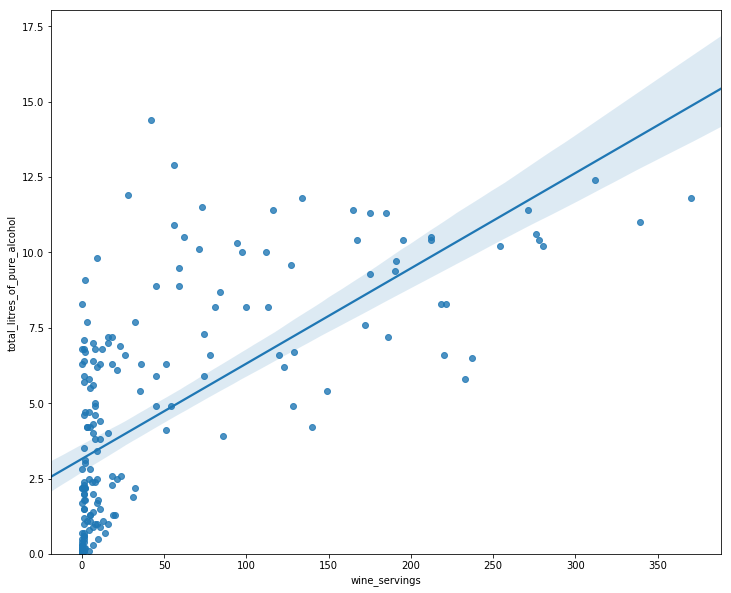

In [13]:
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LinearRegression

#fit linear regression model
lm = LinearRegression()
X = df[['wine_servings']]
Y = df['total_litres_of_pure_alcohol']
lm.fit(X,Y)
Yhat=lm.predict(X)
print("total_litres_of_pure_alcohol = ",lm.intercept_, "+", lm.coef_, "x", "wine_servings")

# calculate the R^2
print('The R-square is: ', lm.score(X, Y))

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="wine_servings", y="total_litres_of_pure_alcohol", data=df)
plt.ylim(0,)


<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> in the following questions.


### Question 7

Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:


Coef= [0.01830291 0.01555814 0.01600524] Intercept= 0.7224498487088482
number of test samples : 20
number of training samples: 173
R^2 of test data= 0.5900674800367458


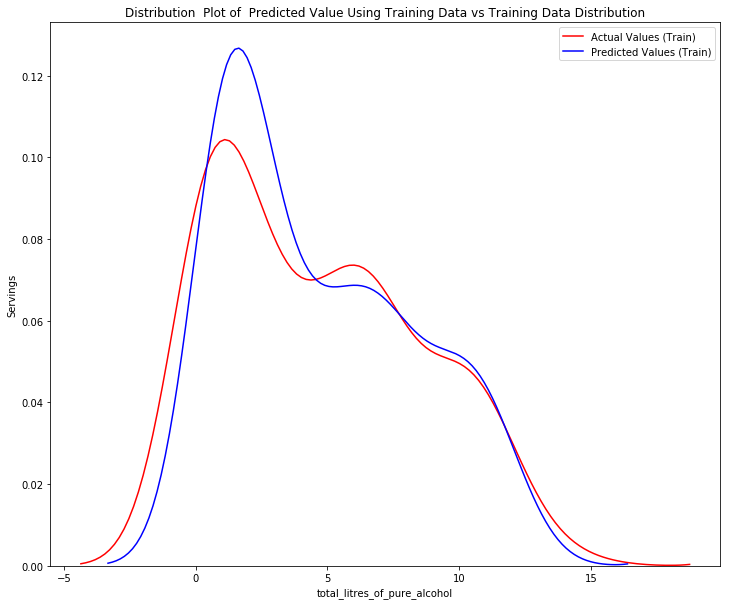

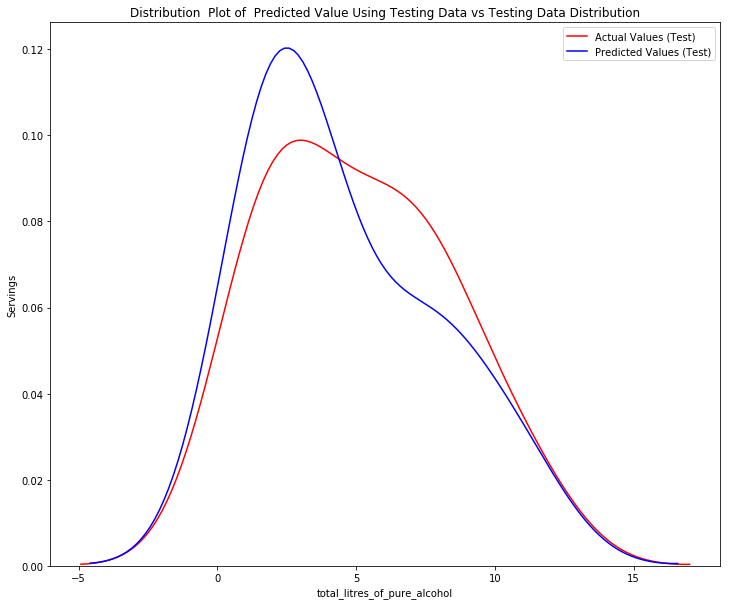

In [64]:
#functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('total_litres_of_pure_alcohol')
    plt.ylabel('Servings')

    plt.show()
    plt.close()
    
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('total_litres_of_pure_alcohol')
    plt.legend()


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#only use numerical data - excluding Country and Continent
df=df._get_numeric_data()

#Fit Multiple Linear Regression Model
LM1 = LinearRegression()
z = df[['beer_servings', 'spirit_servings', 'wine_servings']]
LM1.fit(z, df['total_litres_of_pure_alcohol'])

#Predict total_litres_of_pure_alcohol
Yhat=LM1.predict(z)

#Print Ceof and Intercept
print("Coef=", LM1.coef_,"Intercept=",LM1.intercept_)


#Split Data into testing and trianing
y_data = df['total_litres_of_pure_alcohol']
x_data=df.drop('total_litres_of_pure_alcohol',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

#create linear regression object
lre=LinearRegression()

#train the model
lre.fit(x_train[['beer_servings', 'spirit_servings', 'wine_servings']], y_train)

#find R^2 of test data
print("R^2 of test data=", lre.score(x_test, y_test))


#model prediction
yhat_train = LM1.predict(x_train[['beer_servings', 'spirit_servings', 'wine_servings']])
yhat_train[0:5]
yhat_test = LM1.predict(x_test[['beer_servings', 'spirit_servings', 'wine_servings']])
yhat_test[0:5]

#import matplotlib & seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#create figure 1
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

#create figure 1
Title = 'Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)



<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score

#create pipeline
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

#normalize and fit the training data
pipe.fit(x_train, y_train)

#calculate R^2 of test data
print('The R-square is: ', LM1.score(x_test, y_test))




The R-square is:  0.6078757644718185


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$


In [66]:
from sklearn.linear_model import Ridge

#Create and fit Ridge Regression
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)


#Print R^2
print("R^2 Test Data =", RigeModel.score(x_test, y_test))

R^2 Test Data = 0.5900675002199021


<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 


R^2 Test Data = 0.6403864850156328


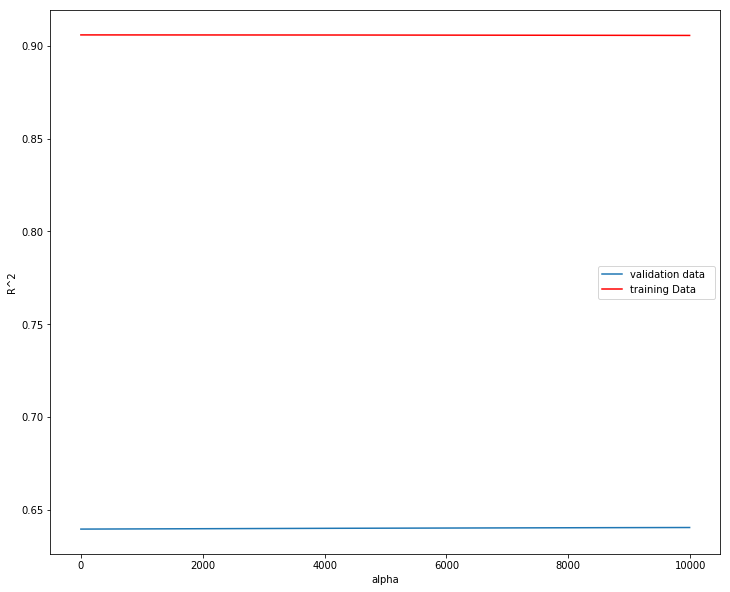

In [67]:
from sklearn.linear_model import Ridge

#Create 2 degree polynomial transformation
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['beer_servings', 'spirit_servings', 'wine_servings']])
x_test_pr=pr.fit_transform(x_test[['beer_servings', 'spirit_servings', 'wine_servings']])

#Create and fit Ridge Regression
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)

#Prediction
yhat = RigeModel.predict(x_test_pr)

#Run Alpha loop
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

#Plot R^2
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

#Print R^2
print("R^2 Test Data =", RigeModel.score(x_test_pr, y_test))

<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook


<b>Sources</b>


<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
